In [61]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [63]:
victims = pd.read_csv('/Users/muskanbansal/Desktop/Data Visualisation/archive/20_Victims_of_rape.csv')
police_hr = pd.read_csv('/Users/muskanbansal/Desktop/Data Visualisation/archive/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('/Users/muskanbansal/Desktop/Data Visualisation/archive/30_Auto_theft.csv')
prop_theft = pd.read_csv('/Users/muskanbansal/Desktop/Data Visualisation/archive/10_Property_stolen_and_recovered.csv')

In [64]:
victims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [65]:
rape_victims=victims
rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [66]:
# Lets find out the total number of rape cases reported per state
statewise_total = rape_victims.groupby("Area_Name")['Rape_Cases_Reported'].agg(np.sum)
statewise_total

Area_Name
Andaman & Nicobar Islands      168
Andhra Pradesh               21392
Arunachal Pradesh              824
Assam                        25524
Bihar                        22526
Chandigarh                     454
Chhattisgarh                 19502
Dadra & Nagar Haveli            98
Daman & Diu                     28
Delhi                        10292
Goa                            532
Gujarat                       6674
Haryana                      10018
Himachal Pradesh              2906
Jammu & Kashmir               4460
Jharkhand                    15126
Karnataka                     7834
Kerala                       10592
Lakshadweep                     14
Madhya Pradesh               58512
Maharashtra                  28892
Manipur                        542
Meghalaya                     1452
Mizoram                       1292
Nagaland                       352
Odisha                       17720
Puducherry                     114
Punjab                        8600
Rajasthan 

Text(0.5, 1.0, 'RAPE CASES/STATE')

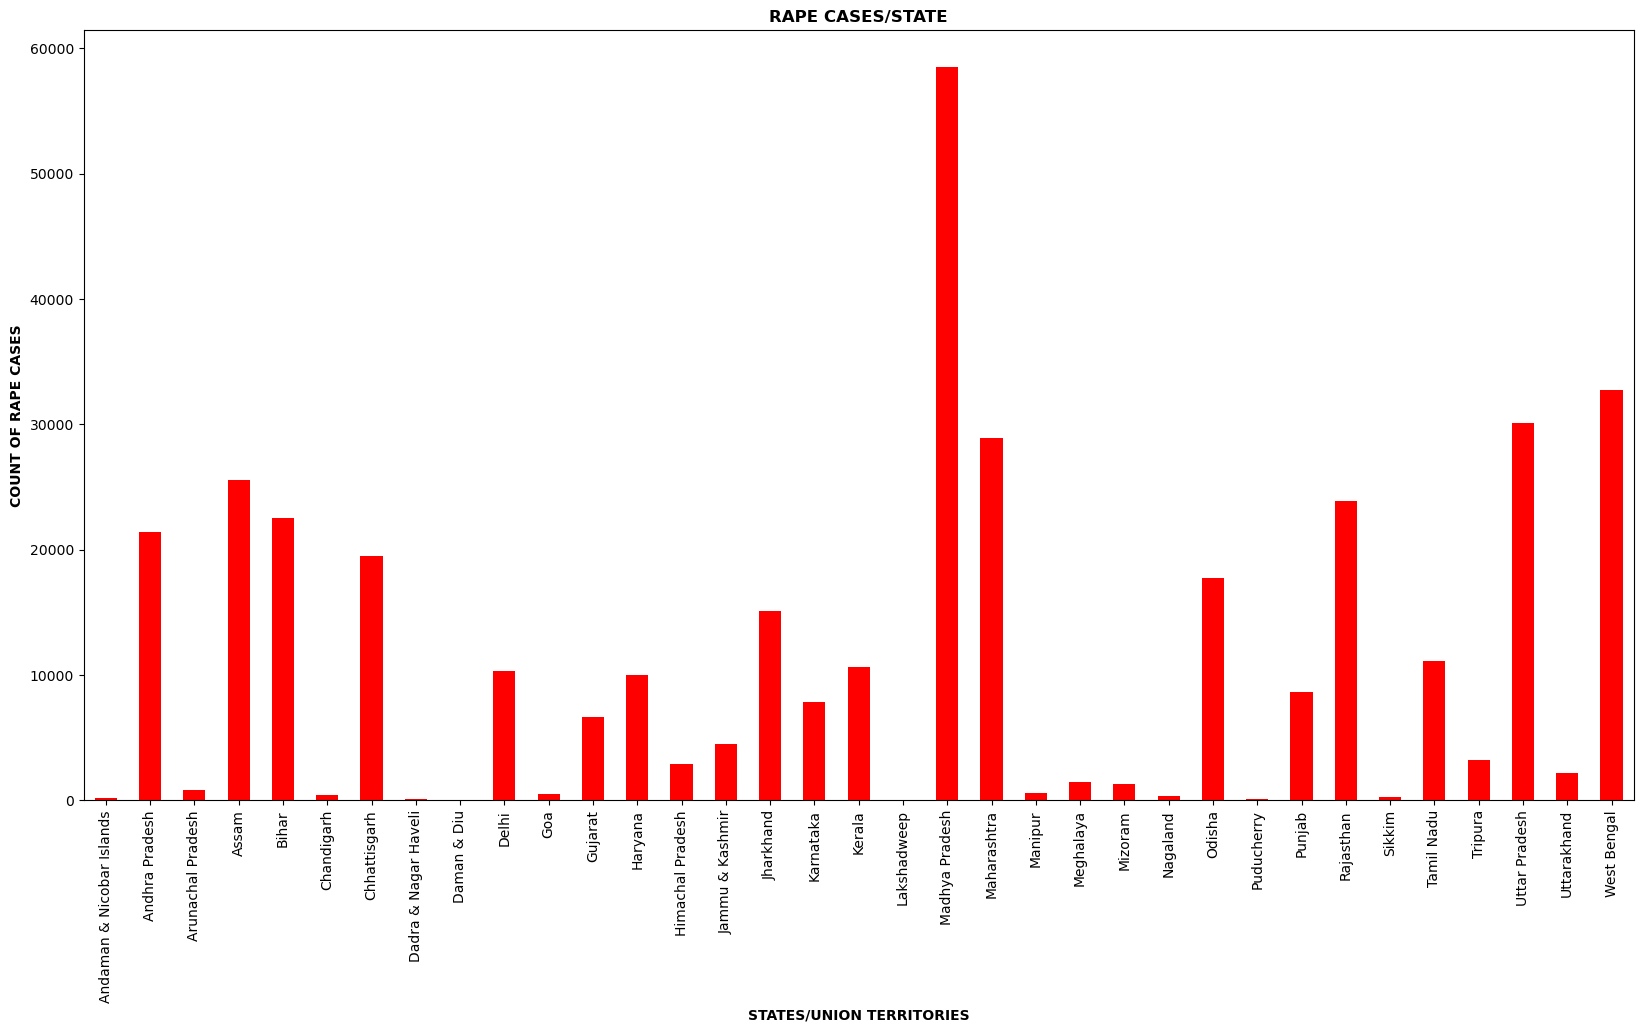

In [67]:
# Plotting the data
statewise_total.plot(kind="bar",figsize=(20,10),color="red")
plt.xlabel("STATES/UNION TERRITORIES",weight='bold')
plt.ylabel("COUNT OF RAPE CASES",weight='bold')
plt.title("RAPE CASES/STATE",weight='bold')
# Here we can see that the maximum crime reported is in Madhya Pradesh followed by West Bengal
# The Color idion for ths is red on a white background since this is a crime based visualisation

In [68]:
# Subgroup wise division on the number of rape cases
subgroupwise_rape = rape_victims.groupby(["Subgroup","Year"])['Rape_Cases_Reported'].agg(np.sum)
subgroupwise_rape=subgroupwise_rape.to_frame().reset_index()

In [69]:
# Barplot to show the count of subgroup rape cases yearwise. We can see a gradual increase of rape cases over the year
fig = px.bar(subgroupwise_rape,x='Year',barmode='stack',y='Rape_Cases_Reported',color='Subgroup',
             labels={
                 "Year":"YEAR",
                 "Rape_Cases_Reported":"RAPE CASES"
             }, title="SUBGROUPWISE RAPE CASES")
fig.show()

In [70]:
# 2010 Year victims of raoe grouped by Area
year2010_wise = rape_victims[rape_victims['Year']==2010].groupby('Area_Name')['Victims_of_Rape_Total'].agg(np.sum).to_frame().reset_index()
year2010_wise

,Area_Name,Victims_of_Rape_Total
0,Andaman & Nicobar Islands,48
1,Andhra Pradesh,2724
2,Arunachal Pradesh,94
3,Assam,3442
4,Bihar,1590
5,Chandigarh,62
6,Chhattisgarh,2024
7,Dadra & Nagar Haveli,6
8,Daman & Diu,2
9,Delhi,1014


In [71]:
# Pie Chart showing the distribution of the statewise 2010 statistics of the victims. It proves the Hypothesis of M
fig = px.pie(year2010_wise,values='Victims_of_Rape_Total',names='Area_Name', title="STATE WISE 2010 STATISTICS")
fig.show()

In [72]:
rape_victims = rape_victims[rape_victims['Subgroup'] != 'Total Rape Victims']

# let's check if the all the rape cases are reported
rape_victims[rape_victims['Victims_of_Rape_Total'] != rape_victims['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


In [73]:
rape_victims['Unreported_Cases'] = rape_victims['Victims_of_Rape_Total'] - rape_victims['Rape_Cases_Reported']

# let's taka a look at the new dataframe
rape_victims[rape_victims['Unreported_Cases'] > 0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


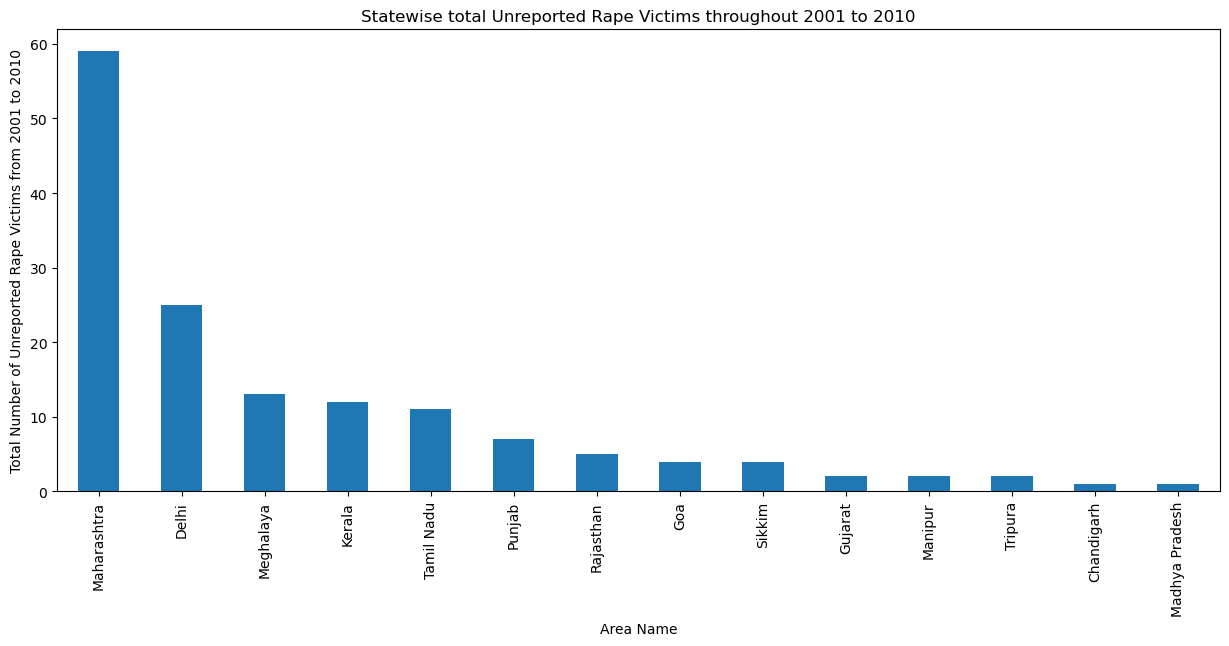

In [74]:
unreported_victims_by_state = rape_victims.groupby('Area_Name').sum()
unreported_victims_by_state.drop('Year', axis = 1, inplace = True)

# let's finally plot it
plt.subplots(figsize = (15, 6))
ct = unreported_victims_by_state[unreported_victims_by_state['Unreported_Cases'] 
                                 > 0]['Unreported_Cases'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()

Looks like Maharastra has the most number of unreported rape cases.

In [75]:
# let's take some general data and plot some simple charts
rape_victims_by_state = rape_victims.groupby('Area_Name').sum()
rape_victims_by_state.drop('Year', axis = 1, inplace = True)
print('Total Rape Victims = ' ,rape_victims_by_state['Rape_Cases_Reported'].sum())
rape_victims_by_state.sort_values(by = 'Rape_Cases_Reported', ascending = False).head()

Total Rape Victims =  190008


,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
Area_Name,,,,,,,,,
Madhya Pradesh,29256,181,2499,5554,14532,5783,29257,708,1
West Bengal,16378,10,156,273,12586,3290,16378,63,0
Uttar Pradesh,15053,12,1424,3092,8076,2086,15053,363,0
Maharashtra,14446,63,1305,4152,6560,1485,14505,940,59
Assam,12762,95,153,409,8507,3552,12762,46,0


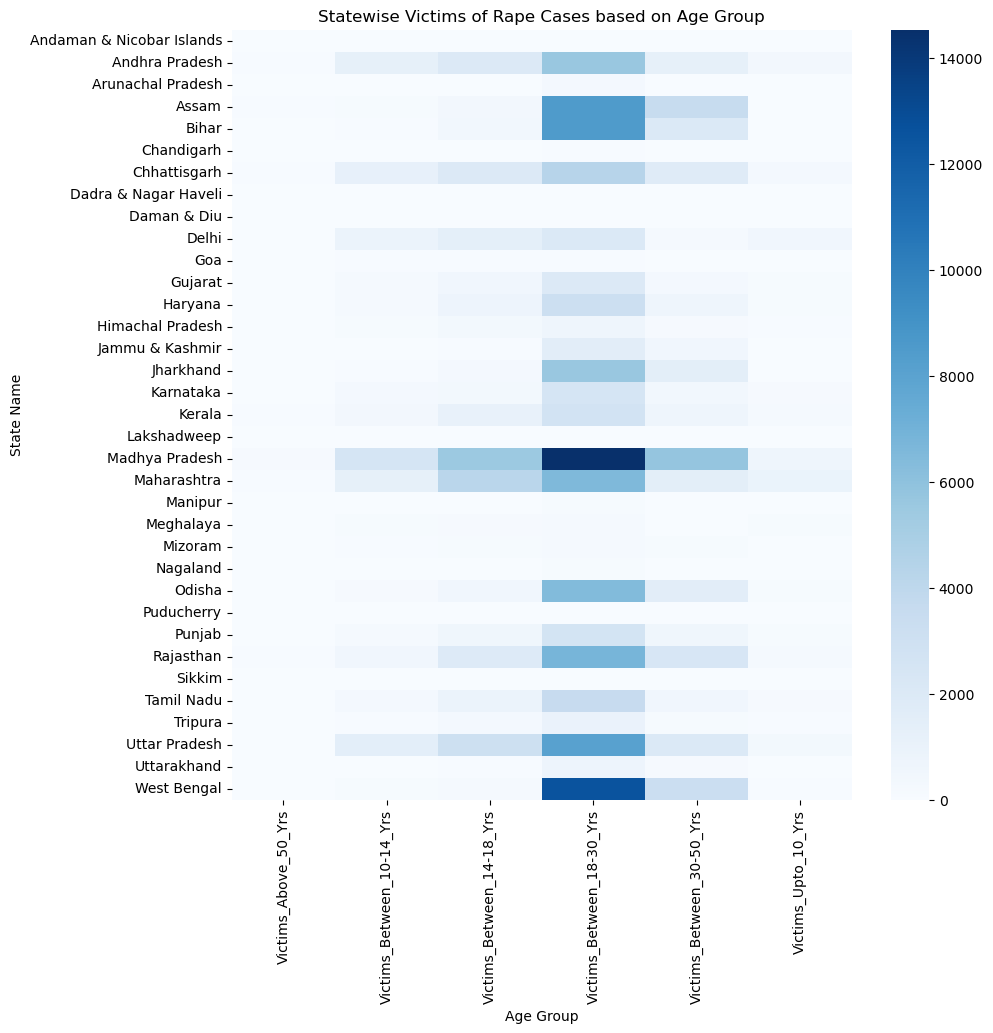

In [76]:
# let's make a heatmap variable
import seaborn as sns
rape_victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported', 
                                                   'Victims_of_Rape_Total', 
                                                   'Unreported_Cases'], axis = 1)
plt.subplots(figsize = (10, 10))
ax = sns.heatmap(rape_victims_heatmap, cmap="Blues")
ax.set_xlabel('Age Group')
ax.set_ylabel('State Name')
ax.set_title('Statewise Victims of Rape Cases based on Age Group')
plt.show()


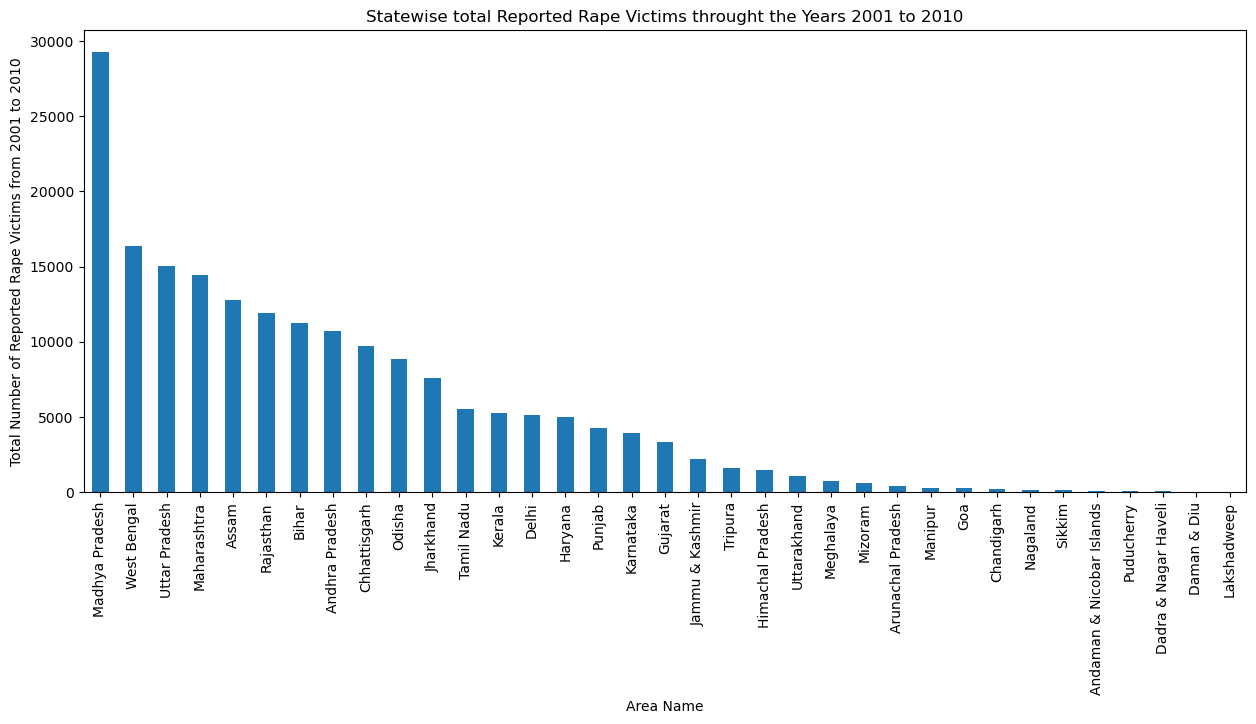

Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                     227
Nagaland  

In [77]:
# let's first plot only the total number of rape cases reported in each state
plt.subplots(figsize = (15, 6))
ct = rape_victims_by_state['Rape_Cases_Reported'].sort_values(ascending = False)
#print(ct)
ax = ct.plot.bar()
#ax = sns.barplot(x = rape_victims_by_state.index, y = rape_victims_by_state['Rape_Cases_Reported'])
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throught the Years 2001 to 2010')
plt.show()
print(ct)

Madhya Pradesh has the most number of rape victims throughout the timespan, West Bengal coming second to it with almost half number of reported rape victims.

Let's have a look at Madhya Pradesh First

### Exploring Data for Madhya Pradesh

In [78]:
mp_rape_victims = rape_victims[rape_victims['Area_Name'] == 'Madhya Pradesh']

# let's have a look in the data
mp_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10,0
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76,0
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3,0
575,Madhya Pradesh,2002,Victims of Other Rape,2819,13,174,236,1512,807,2819,77,0
577,Madhya Pradesh,2003,Victims of Incest Rape,123,0,10,23,71,16,123,3,0


Yearly plot of the number of rape victims in Madhya Pradesh

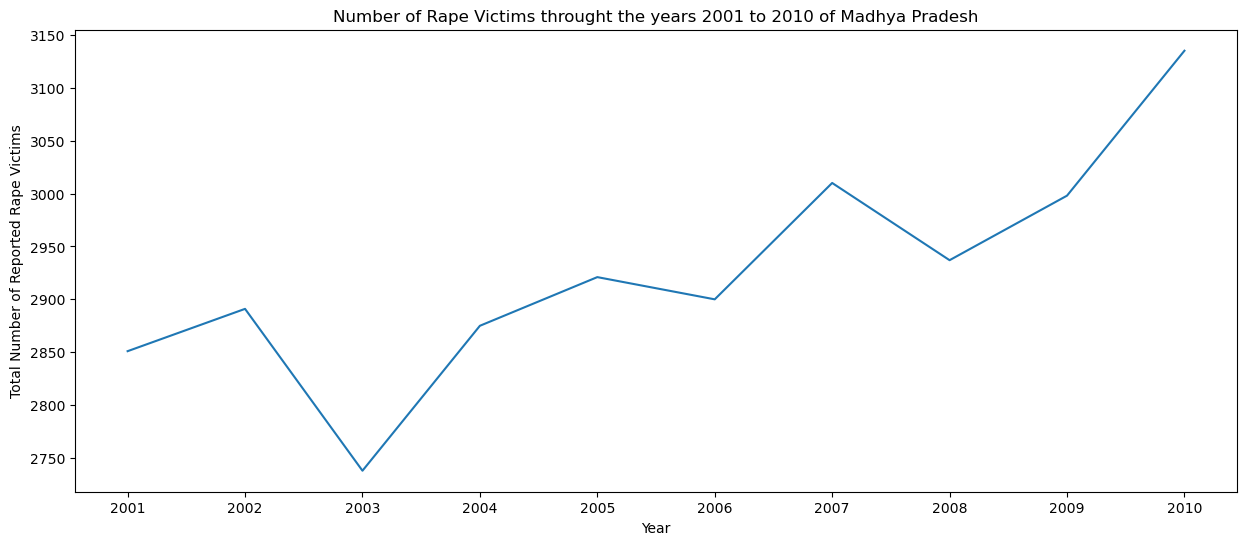

In [79]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
mp_rape_victims_by_year = mp_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = mp_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()

Previously, when exploring the data set, we've also seen an index for incest rape cases. Let's compare the numbers of incest rape cases to other rape cases for the sate of Madhya Pradesh

Yearly Distribution of Number of Incest Rape Victims in Madhya Pradesh

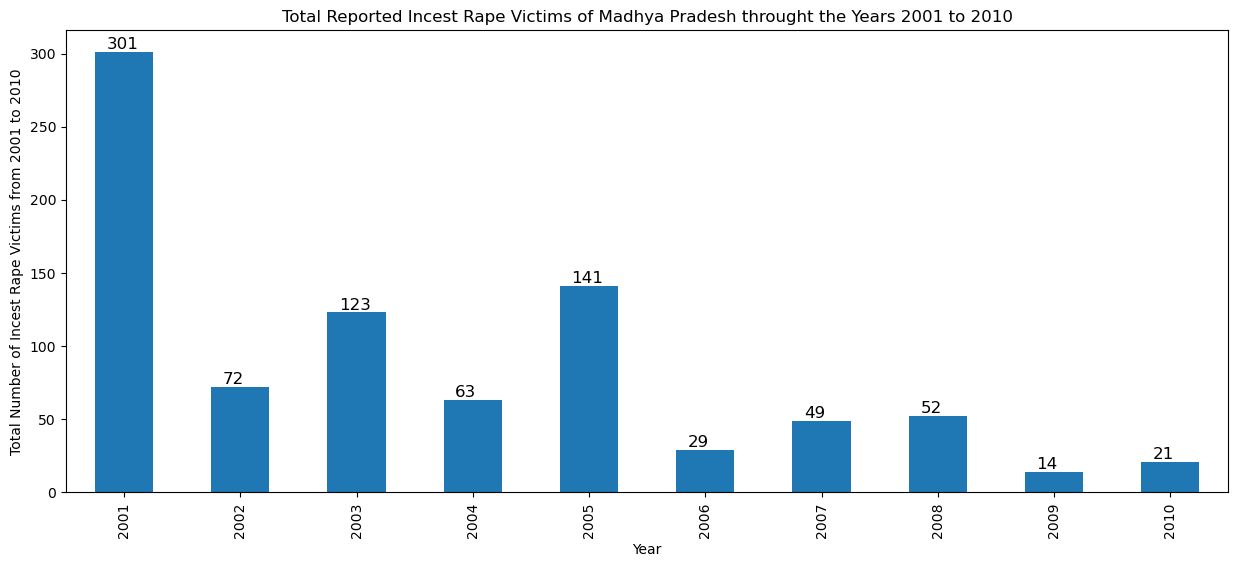

In [80]:
# let's first see the mp_rape_victims dataframe
#mp_rape_victims.head()

# plot the dataframe
mp_incest_rape_cases = mp_rape_victims[mp_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = mp_incest_rape_cases.groupby('Year').sum()
ax = ct['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2),fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of Madhya Pradesh throught the Years 2001 to 2010')
plt.show()

An important question that comes to your mind: `mWhat happened in 2001?

A total of 301 incest rapes were reported that year.

Data for West Bengal

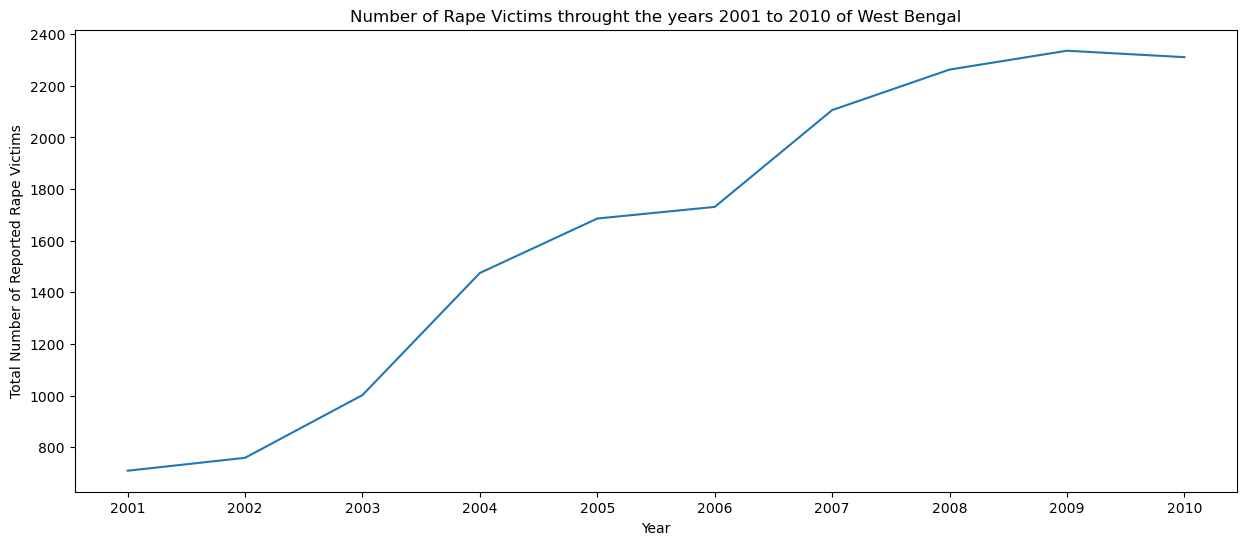

In [81]:
wb_rape_victims = rape_victims[rape_victims['Area_Name'] == 'West Bengal']

# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
wb_rape_victims_by_year = wb_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = wb_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',
       title = 'Number of Rape Victims throught the years 2001 to 2010 of West Bengal')
plt.show()

This is unfortunate, while we've seen a random trend in the number of rape victims in Madhya Pradesh, although we've also seen an overall increase. But in West Bengal, the plot shows a clear trend of yearly increasing number of rapes (except for 2006, where the number was almost constant). However, the numbers are very disappointing.



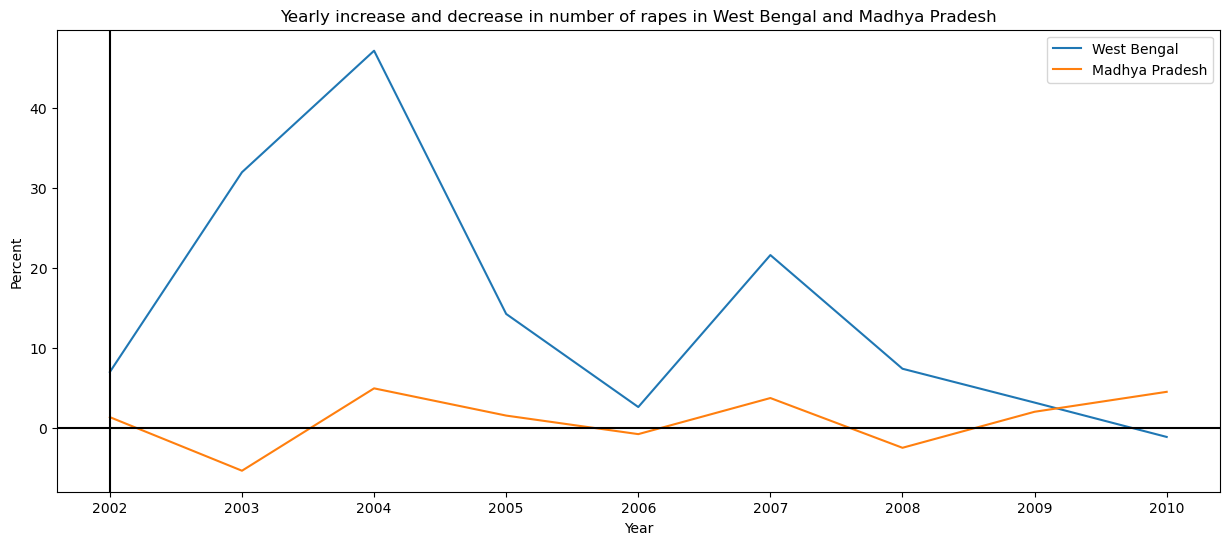

Overall Increase in number of rapes in West Bengal = 69.32 Percent
Overall Increase in number of rapes in Madhya Pradesh = 12.29 Percent


In [82]:
# let's calculate the percentage increase of number of rapes in West Bengal and compare 
# it with Madhya Pradesh
plt.subplots(figsize = (15, 6))
ax = (wb_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True, 
                                                                              label = 'West Bengal')
(mp_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, 
                                                                         label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in West Bengal and Madhya Pradesh')
ax.axhline(0, color = 'black')
ax.axvline(2002, color = 'black')
plt.show()
print('Overall Increase in number of rapes in West Bengal =', 
      '{0:.2f}'.format(((wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - wb_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')
print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((mp_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - mp_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

We can clearly see that overall increase in west bengal is much higher. Also, it's clear that the increase is consistant in West Bengall till 2010.

However, in Madhya Pradesh, there's both increase and decrease in the number of rapes throught the years. Although the overall number of rapes is much higher than that of West Bengal, but the percentage of increase/decrease says that Madhya pradesh is a much safer state.

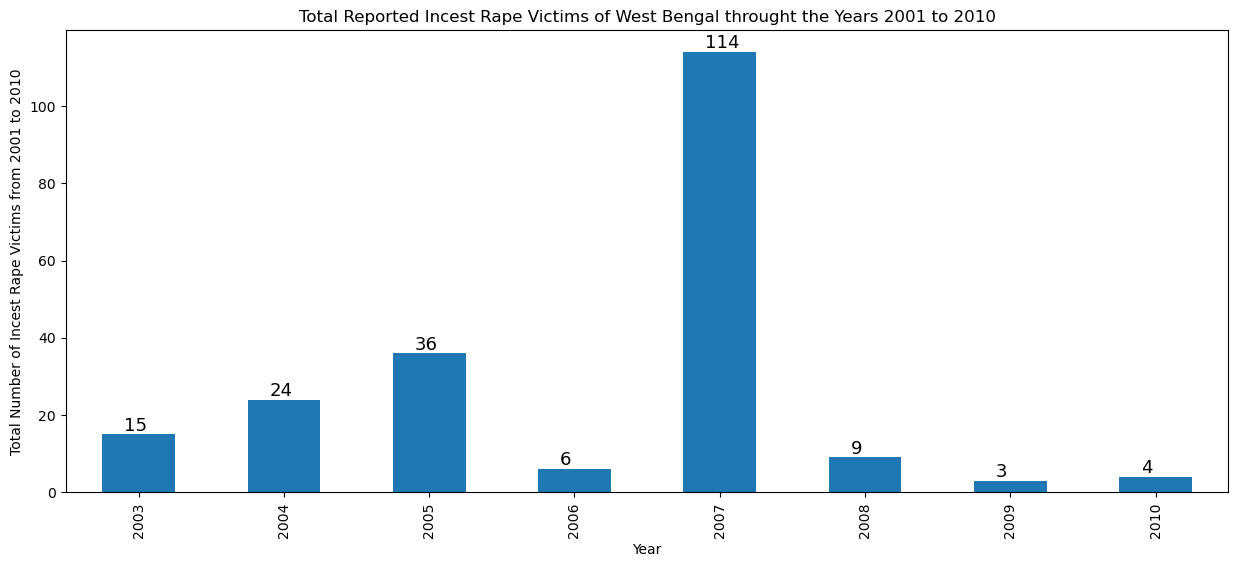

In [83]:
# incest rape cases in Bengal
wb_incest_rape_cases = wb_rape_victims[wb_rape_victims['Subgroup'] == 'Victims of Incest Rape']
plt.subplots(figsize = (15,6))
ct = wb_incest_rape_cases.groupby('Year').sum()
ax = ct[ct['Rape_Cases_Reported'] > 0]['Rape_Cases_Reported'].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + .15, p.get_height()+1),fontsize=13)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Incest Rape Victims from 2001 to 2010')
ax.set_title('Total Reported Incest Rape Victims of West Bengal throught the Years 2001 to 2010')
plt.show()

The most number of incest rape cases happened in 2007, a total of 114.. Also, if we compare it to Madhya Pradesh, no incest rape cases were reported for the year 2001 an 2002

In [84]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']

fig = px.bar(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'])
fig.show()

State/UT wise incest rape cases reported from 2001 to 2010

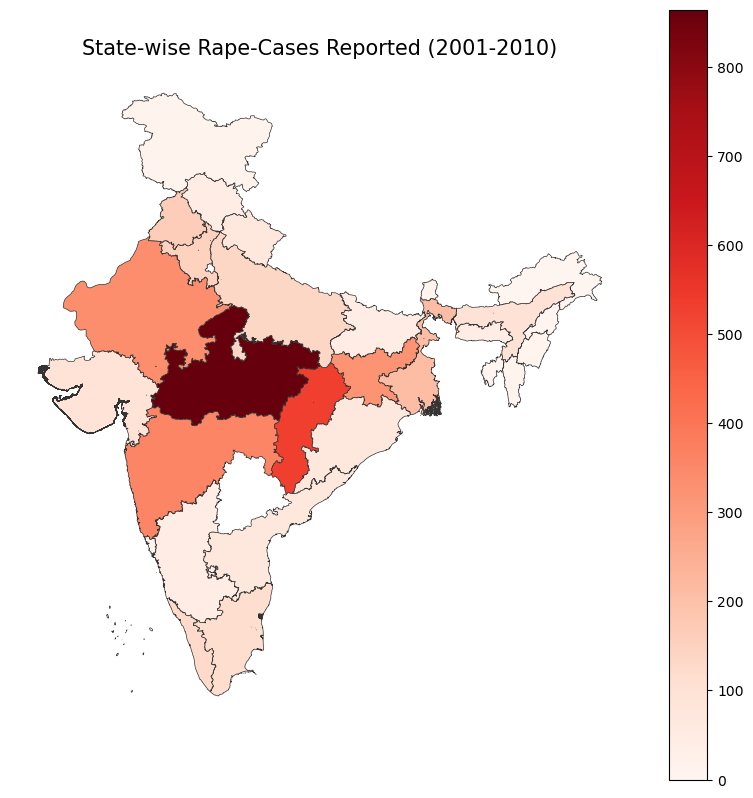

In [85]:
g1 = pd.DataFrame(inc_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','Cases Reported']
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/Users/muskanbansal/Desktop/Data Visualisation/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

Top 3 states having highest number of cases - Madhya Pradhesh, Chhatisgarh, Rajasthan
Top 3 states having lowest number of cases - Tripura, Manipur, Goa

Distribution of age groups of victims 

In [86]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show()

Women between the age group of 18-30 have been most affected
Women between the age group above 50 have been least affected

### Human Rights violation by the Police 
Human Rights in India is an issue complicated by the country's large size and population, widespread poverty, lack of proper education, as well as its diverse culture, despite its status as the world's largest sovereign, secular, democratic republic.

State/UT wise cases registered under Human Rights violation from 2001 to 2010 

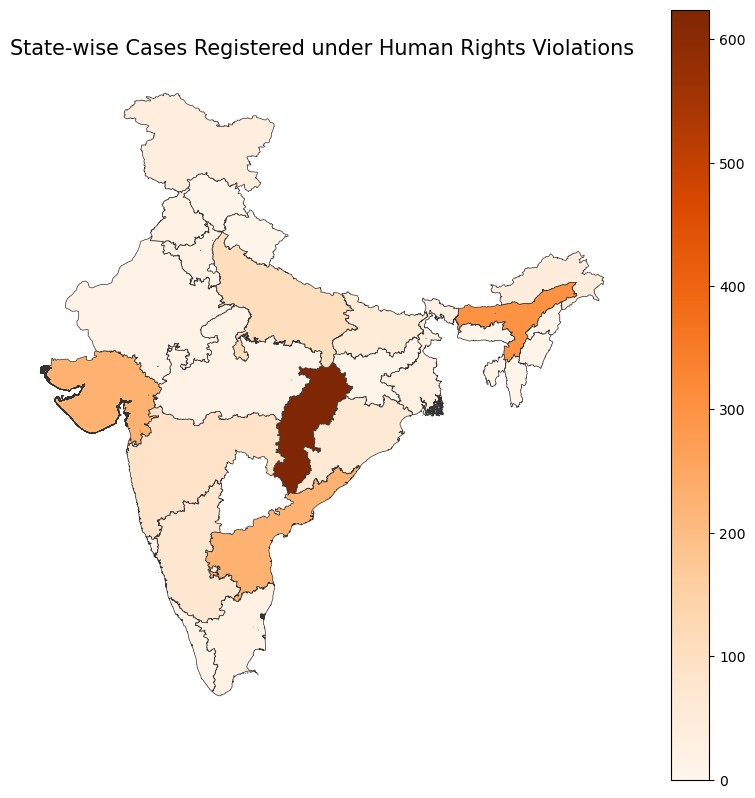

In [87]:
g2 = pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g2.columns = ['State/UT','Cases Reported']

g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

merged = shp_gdf.set_index('st_nm').join(g2.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Cases Registered under Human Rights Violations',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

Top 3 states with highest number of cases against police Chhatisgrah, Assam, Gujarat
Top 3 states with lowest number of cases against police Manipur, Uttarakhand, Goa

Cases registered against Police under Human Rights violations from 2001 to 2010 ¶


In [88]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']

fig = px.bar(g3,x='Year',y='Cases Registered',color_discrete_sequence=['green'])
fig.show()

In [89]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Torture                                    190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

In [90]:
fake_enc_df = police_hr[police_hr['Group_Name']=='HR_Fake encounter killings'] 
fake_enc_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

In [91]:
false_imp_df = police_hr[police_hr['Group_Name']=='HR_False implication'] 
false_imp_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

In [92]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Policemen Chargesheeted', x=year, y=g4['Policemen_Chargesheeted'],
           marker_color='purple'),
    go.Bar(name='Policemen Convicted', x=year, y=g4['Policemen_Convicted'],
          marker_color='red')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of policemen')
fig.show()

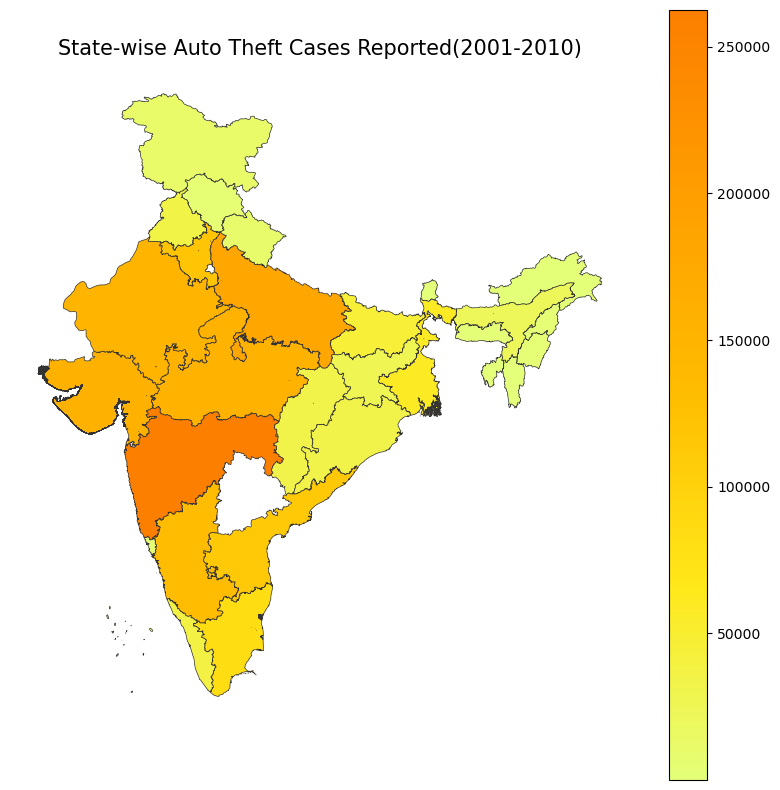

In [93]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [94]:
auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

colors = ['crimson','gold','green']

fig = go.Figure(data=[go.Pie(labels=vehicle_group, values=vehicle_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

In [95]:
g5 = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())

g5.columns = ['Year','Vehicles Stolen']

fig = px.bar(g5,x='Year',y='Vehicles Stolen',color_discrete_sequence=['#17becf'])
fig.show()

In [96]:
vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

sr_no = [1,2,3,4,5]

fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[sr_no,vehicle_list],
                            height=30))
                     ])
fig.show()

In [97]:
motor_c = auto_theft[auto_theft['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g8 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g8_sorted = g8.sort_values(['Auto_Theft_Stolen'],ascending=True)
fig = px.bar(g8_sorted.iloc[-10:,:], y='Area_Name', x='Auto_Theft_Stolen',
             orientation='h',color_discrete_sequence=['#008080'])
fig.show()

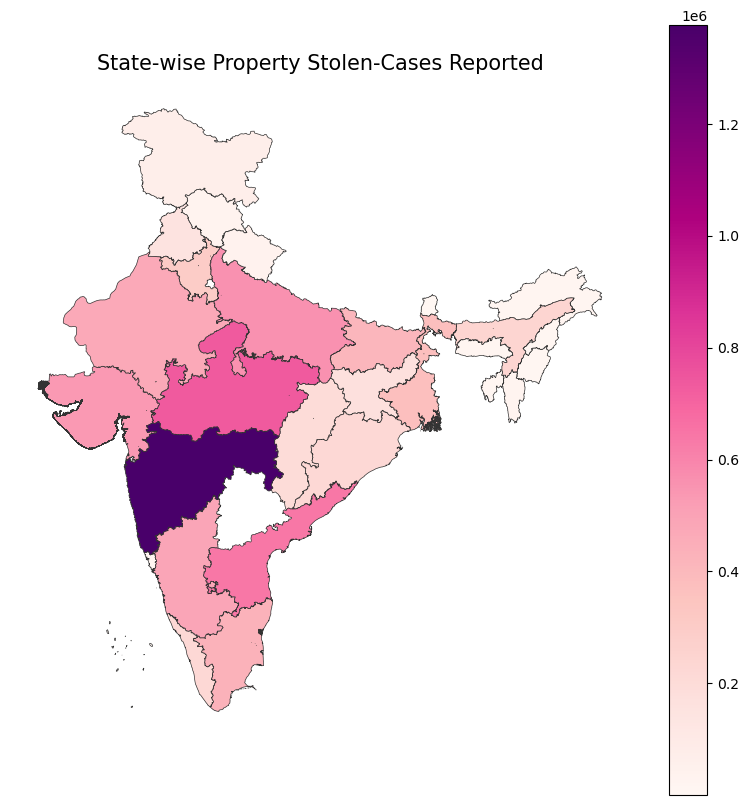

In [98]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases Reported']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

merged = shp_gdf.set_index('st_nm').join(g7.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [99]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_group = ['Property Stolen Cases','Property Recovered Cases']
prop_vals = [prop_theft_stolen,prop_theft_recovered]

colors = ['red','green']

fig = go.Figure(data=[go.Pie(labels=prop_group, values=prop_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

In [100]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered'],
           marker_color='gold'),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Value in Rupees',
                 title='Year-wise Value of Property Stolen and Recovered')
fig.show()